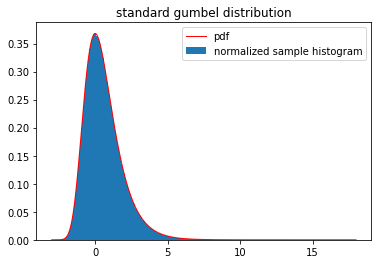

number of samples : 10000000
max(sample):  16.784641619358105
min(sample):  -2.806640649340083


In [78]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-20

def gumbel_pdf(x, mu=0.0, beta=1.0):
    z = (x - mu)/beta
    return np.exp(-z - np.exp(-z))/beta

def gumbel_sampling(num_data):
    u = np.random.rand(num_data)
    return -np.log(-np.log(u + eps) + eps)


num_samples = 10000000
sample = gumbel_sampling(num_samples)
plt.title('standard gumbel distribution')
plt.hist(sample, bins=1000, density=True, label='normalized sample histogram')
x = np.linspace(-3.0, 18.0, 1000)
plt.plot(x, gumbel_pdf(x), c='r', label='pdf', linewidth=1)
plt.legend()
plt.show()
print('number of samples :', num_samples)
print('max(sample): ', np.max(sample))
print('min(sample): ', np.min(sample))

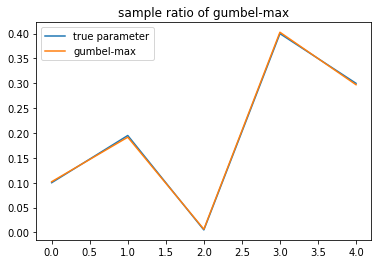

number of samples : 5000
ratio of 0:  0.102
ratio of 1:  0.1916
ratio of 2:  0.0064
ratio of 3:  0.4028
ratio of 4:  0.2972


In [84]:
def gumbel_max_sampling(param, num_samples):
    log_p = np.log(param)
    g = gumbel_sampling(len(param) * num_samples).reshape(num_samples, len(param))
    return np.argmax(log_p + g, axis=1)


num_samples = 5000
p = [0.1, 0.195, 0.005, 0.4, 0.3]
sample = gumbel_max_sampling(param=p, num_samples=num_samples)
sample_density = []
for k in range(len(p)):
    sample_density.append((sample == k).mean())
plt.title('sample ratio of gumbel-max')
plt.plot(np.arange(len(p)), p, label='true parameter')
plt.plot(np.arange(len(p)), sample_density, label='gumbel-max')
plt.legend()
plt.show()

print('number of samples :', num_samples)
for k in range(len(p)):
    print('ratio of {}: '.format(k), sample_density[k])

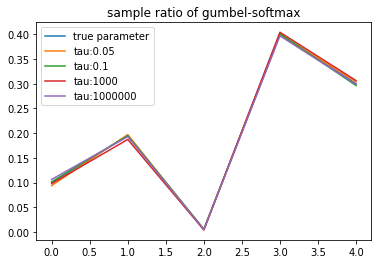

In [86]:
def gumbel_softmax_sampling(param, tau, num_samples):
    log_p = np.log(param)
    g = gumbel_sampling(len(param) * num_samples).reshape(num_samples, len(param))
    x = (log_p + g)/tau
    exp_x = np.exp(x)
    y = exp_x / exp_x.sum(axis=1).reshape(-1, 1)
    return np.argmax(y, axis=1)


num_samples = 10000
plt.plot(np.arange(len(p)), p, label='true parameter')
tau_list = [0.1, 1000, 1000000]
for tau in tau_list:
    sample = gumbel_softmax_sampling(param=p, tau=tau, num_samples=num_samples)
    sample_density = []
    plt.title('sample ratio of gumbel-softmax')
    for k in range(len(p)):
        sample_density.append((sample == k).mean())
    plt.plot(np.arange(len(p)), sample_density, label='tau:{}'.format(tau))
plt.legend()
plt.show()

In [106]:
pi = [0.25, 0.25, 0.25, 0.25]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 0.01
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.25, 0.25, 0.25, 0.25] 이고 sampling 된 vector가  [1. 0. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [ 0.00000000e+000 -9.29684249e-068 -2.65119472e-095 -2.26624887e-122]

sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [-9.29684249e-068  9.29684249e-068 -6.16193494e-165 -5.26723970e-192]

sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [-2.65119472e-095 -6.16193494e-165  2.65119472e-095 -1.50206676e-219]

sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 0.01 일 때, pi의 gradient [-2.26624887e-122 -5.26723970e-192 -1.50206676e-219  2.26624887e-122]


In [107]:
pi = [0.25, 0.25, 0.25, 0.25]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 1
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.25, 0.25, 0.25, 0.25] 이고 sampling 된 vector가  [0. 1. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [ 0.22359526 -0.11184675 -0.00623923 -0.10550927]

sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [-0.11184675  0.99651693 -0.04939363 -0.83527655]

sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1 일 때, pi의 gradient [-0.00623923 -0.04939363  0.10222773 -0.04659487]

sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1 일 때, pi의 gradient [-0.10550927 -0.83527655 -0.04659487  0.98738069]


In [109]:
pi = [0.25, 0.25, 0.25, 0.25]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 1000000
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.25, 0.25, 0.25, 0.25] 이고 sampling 된 vector가  [0. 1. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [ 7.49999741e-07 -2.49999987e-07 -2.49999903e-07 -2.49999852e-07]

sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-2.49999987e-07  7.50000232e-07 -2.50000148e-07 -2.50000097e-07]

sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-2.49999903e-07 -2.50000148e-07  7.50000064e-07 -2.50000013e-07]

sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1000000 일 때, pi의 gradient [-2.49999852e-07 -2.50000097e-07 -2.50000013e-07  7.49999963e-07]


In [113]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 0.01
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [0. 0. 0. 1.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [ 4.69783420e-194 -0.00000000e+000 -0.00000000e+000 -4.84312805e-196]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [-0.00000000e+000  1.46597504e-258 -0.00000000e+000 -1.51131448e-260]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 0.01 일 때, pi의 gradient [-0.00000000e+000 -0.00000000e+000  1.27066810e-235 -1.30996711e-237]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 0.01 일 때, pi의 gradient [-4.69783420e-194 -1.46597504e-258 -1.27066810e-235  0.00000000e+000]


In [114]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 1
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [0. 0. 0. 1.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [ 0.68949006 -0.00840817 -0.0057799  -0.00696188]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [-0.00840817  1.19634376 -0.01008124 -0.01214283]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1 일 때, pi의 gradient [-0.0057799  -0.01008124  0.82553564 -0.00834716]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1 일 때, pi의 gradient [-0.675302   -1.17785436 -0.80967451  0.02745186]


In [115]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = gumbel_sampling(len(log_pi))
tau = 1000000
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [0. 0. 0. 1.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [ 1.87499948e-05 -6.24999214e-06 -6.24998602e-06 -6.44331608e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.24999214e-06  1.87499895e-05 -6.24998340e-06 -6.44331338e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.24998602e-06 -6.24998340e-06  1.87499773e-05 -6.44330708e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.25001660e-06 -6.25001398e-06 -6.25000786e-06  1.93299365e-07]


In [116]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = np.array([10, 0, 0, 0])
tau = 0.1
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [1. 0. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 0.1 일 때, pi의 gradient [ 0.00000000e+00 -3.72007598e-41 -3.72007598e-41 -2.82811730e-23]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 0.1 일 때, pi의 gradient [-3.72007598e-41  3.72007598e-41 -1.38389653e-84 -1.05208112e-66]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 0.1 일 때, pi의 gradient [-3.72007598e-41 -1.38389653e-84  3.72007598e-41 -1.05208112e-66]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 0.1 일 때, pi의 gradient [-2.74327378e-21 -1.02051869e-64 -1.02051869e-64  2.82811730e-23]


In [117]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = np.array([10, 0, 0, 0])
tau = 1
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [1. 0. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [ 0.44544611 -0.00449946 -0.00449946 -0.00449946]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1 일 때, pi의 gradient [-4.49945564e-03  4.51947458e-03 -2.04274970e-07 -2.04274970e-07]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1 일 때, pi의 gradient [-4.49945564e-03 -2.04274970e-07  4.51947458e-03 -2.04274970e-07]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1 일 때, pi의 gradient [-4.36447197e-01 -1.98146721e-05 -1.98146721e-05  4.49986419e-03]


In [118]:
pi = [0.01, 0.01, 0.01, 0.97]
log_pi = np.log(pi)
g = np.array([10, 0, 0, 0])
tau = 1000000
x = (log_pi + g) / tau 
exp_x = np.exp(x)
softmax_x = exp_x/np.sum(exp_x)
one_hot = np.zeros_like(softmax_x)
one_hot[np.argmax(softmax_x)] = 1.0
print('pi 가', pi, '이고 sampling 된 vector가 ', one_hot ,'일 때')

output_grad = [1.0, 0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 1.0, 0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 1.0, 0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)

output_grad = [0.0, 0, 0, 1.0]
print()
print('loss function에 대한 sampled vector의 gradient가 ', output_grad, '일 때')
x_grad = (output_grad - np.sum(exp_x * output_grad)/np.sum(exp_x)) * exp_x /np.sum(exp_x)
pi_grad = x_grad / (np.array(pi) * tau)
print('tau가 {} 일 때, pi의 gradient'.format(tau), pi_grad)


pi 가 [0.01, 0.01, 0.01, 0.97] 이고 sampling 된 vector가  [1. 0. 0. 0.] 일 때

loss function에 대한 sampled vector의 gradient가  [1.0, 0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [ 1.87500795e-05 -6.25001695e-06 -6.25001695e-06 -6.44334592e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 1.0, 0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.25001695e-06  1.87499545e-05 -6.24995445e-06 -6.44328149e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 1.0, 0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.25001695e-06 -6.24995445e-06  1.87499545e-05 -6.44328149e-08]

loss function에 대한 sampled vector의 gradient가  [0.0, 0, 0, 1.0] 일 때
tau가 1000000 일 때, pi의 gradient [-6.25004555e-06 -6.24998305e-06 -6.24998305e-06  1.93299089e-07]
